### Libraries


1.   *Standard libraries:*
  *   [pickle](https://docs.python.org/3/library/pickle.html) - *implements binary protocols for serializing and de-serializing Python object structures*
  *   [argparse](https://docs.python.org/3/library/argparse.html) - *makes it easy to write user friendly command-line interfaces*
  *   [time](https://docs.python.org/3/library/time.html) - *module provides various time-related functions*
  *   [os](https://docs.python.org/3/library/os.html) - *module provides a portable way of using operating system dependent functionalities*



2.   *Third Party libraries*
  *   [mlflow](https://www.mlflow.org/docs/latest/index.html) - Open source platform for managing end-to-end machine learning lifecycle, used in this project for experiment tracking
  *   [pandas](https://pandas.pydata.org/docs/index.html) - Python high performance, easy-to-use data structures and data analysis tool
  *   [numpy](https://numpy.org/) - Python fundamental package for scientific computing
  *   [matplotlib](https://matplotlib.org/). - popular python data visualization library 
  *   [Seaborn](https://seaborn.pydata.org/) - Python data visualization library based on matplotlib
  *   [Scipy](https://scipy.org/) - Python open-source library for scientific computing 
  *   [Scikit-learn](https://scikit-learn.org/stable/) - popular python machine learning framework
  *   [Xgboost](https://xgboost.readthedocs.io/en/stable/index.html) - An optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
  *   [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html) - fast distributed gradient boosting framework that uses tree-based learning algorithms
  *   [hyperopt](http://hyperopt.github.io/hyperopt/) - *distributed asynchronous hyperparameter optimization libraries based on bayersian optimization algorithms. For this project we use* `TPE = Tree of Parzen Estimators`







### Folder Structure

>  `.venv` - Virtual environment folder

> `deployment/` - *contains deployment code and artefacts*
  *   `data/` - folder for validation data (`.csv`); you can also provide file path to the holdout validation dataset
  *   `formats/` -  contains two files:
    *   `load_format.csv`: file format to make sure that user provided file has the same csv headers as the dataset
    *   `train_format.csv`: contains filtered columns of the dataset used for training i.e. after dropping some features
  * `models/` - contains the pickle files for both the `lightgbm` and `xgboost` models
  * `predictions/` - where the prediction csv files are stored after running predictions
    * prediction are in the format `predictions_model_type_timestamp` e.g: `prediction_xgb_10303030393040.csv`


> `training/` - *contains training code and artefacts*
  * `data/` - *contains the training data in CSV*
  * `mlruns/` - *mlflow logs from experiment runs*
  * `models/` - *training model artefacts folder*
  * `mlflow.db` - SQLite DB for MLflow tracking backend
  * `wallet-hub-assignment` - Jupyter notebook used for training and experimentation

> `.gitignore` - git ignore file

> `README.md`  - Read me file

> `requirements.txt` - third requirements file







### Data Loading

**Possible key improvements**

*   Would have used `Dask` or `cuDF` distributed GPU based data structures and analysis due to large dataset. Decided to stick to `pandas` since compute resources were limited



### Data Cleaning

**Key decisions**

*   `Extreme null columns removal` - dropped columns that have more than $55\%$ of their values as nulls
*   `Extreme zeros columns removal` - dropped columns that have more $79\%$ zero values
* `fill null values` - used mean strategy to fill null values



**Possible key improvement(s)**

*   Possible experiment with other fillna strategies e.g. `median`, `KNN` and see if it improves the model(s) `accuracy` or `rmse`
* Increase the threshold for `null columns removal` but $0.55 (55\%)$ seems to work fine




### Feature Selection

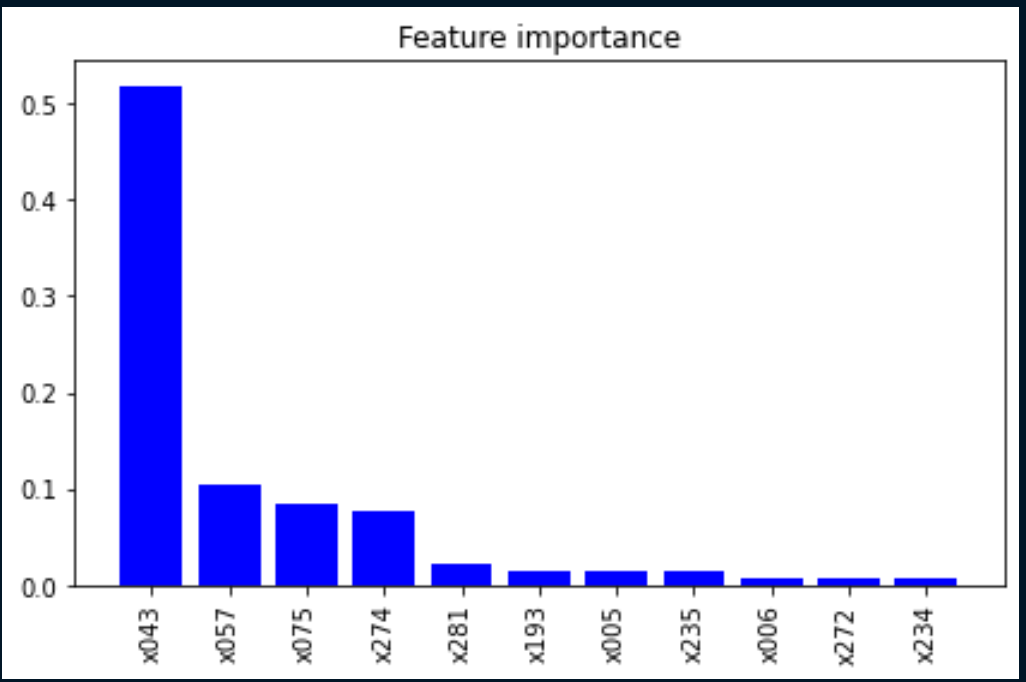

*x043, x057, x075, x274, x281, x193, x005, x235, x006, x272, x234* are the most discriminative features of the dataset based on the average impurities of *1000 decision trees*

**Key decision**

*   Used *random forest* to calculate *feature importances*
  * Computed as the *average impurity decrease* from all *decision trees* in the *forest* without making the assumption about whether the data is *linearly separable or not*




**Improvements**

*   Would have experiment with other:
  *   *unsupervised feature data compression algorithms* such as `Principal Component analysis` and see if it improves model performance - sort of ignored this approach since I was using `gradient boosted tree-based models` 
  *   *supervised data compression algorithms* such as `Linear Discriminant Analysis`
  *  `t-distributed stochastic neighbor embedding`


**Limitations of RandomForest feature importances**

In the case of *two or more features that are highly correlated*, one feature may be ranked very highly while the information on the other features may not be fully captured. On the other hand since our usecase is more concerned with accuracy we don't need to bother.

### Hyperparameter tuning 

**Key decision - hyperparameter tuning**

*   Used [Hyperopt](https://) for hyperparameter tuning using the `Tree-Structured Parzen estimators - TPE ` method, *TPE* is a bayesian optimization method based on probabilistic model that is continuously updated based on past hyperparameter evaluations and the associated performance scores instead of regarding these evaluations as independent events. More on TPE check out [Algorithms for Hyper-Parameter Optimization. Bergstra J, Bardenet R, Bengio Y, Kegl B. NeurIPS 2011. pp. 2546–2554,](https://dl.acm.org/doi/10.5555/2986459.2986743) paper



**Improvements**

*   Would have used `k-fold` instead of `hold-out` cross-validation with `hyperopt` on distributed GPU for hyperparameter optimization



### Model Experiments

Used `mlflow` to track experiments, as part of my submission is `experiments.csv` exported from mlflow

**Algorithm used and resulting metric after tuning**

`Accuracy` - if the `absolute error` of prediction is `greater than 3.0`, we regard the prediction as `wrong` else `correct`

1.   *Lasso regression - (best params)*
  *   $r2\_score=0.826$
  *   $rmse=49.48$
  *   $validation\_accuracy = 0.062$


2.   *Ridge Regression - (best params)*
  *   $r2\_score=0.826$
  *   $rmse=49.48$
  *   $validation\_accuracy = 0.061$

3.   *Xgboost - (best params)*
  *   $validation\_r2\_score=0.949$
  *   $validation\_rmse=26.56$
  *   $validation\_accuracy = 0.147$
  *   $test\_r2\_score = 0.948$
  *   $test\_rmse=27.094$
  *   $test\_accuracy = 0.152$
4.   *lightgbm - (best params)*
  *   $validation\_r2\_score=0.950$
  *   $validation\_rmse=26.37$
  *   $validation\_accuracy = 0.143$
  *   $test\_r2\_score = 0.949$
  *   $test\_rmse=26.801$
  *   $test\_accuracy = 0.142$









**Decision table - XGBoost, LightGBM**

| Parameters | XGBoost | LightGBM |
| --- | --- | --- |
| Model size | 8.94MB | 17.01MB|
| Prediction-time (100k datapoints) | 0.84s| 3.53s|
| Prediction-accuracy (100k datapoints) | 0.22| 0.20|
| validation-accuracy (9k datapoints) | 0.147| 0.143|
| Test-accuracy (10k datapoints) | 0.152| 0.142|
| Prediction-RMSE (100k datapoints) | 17.55| 17.82|
| validation-RMSE(9k datapoints) | 26.56| 26.37|
|Test-RMSE (10k datapoints) | 27.094| 26.801|


**Key decisions**

1. Chose `Xgboost` as default model, on average it is a better model than `LightGBM` based on the table above


### Running scoring script


1.   Activate the virtual environment (`.venv`):
  *   *On mac:*  *run*  `source .venv/bin/activate`
  *   *On windows:* *run* `.\.venv\bin\activate`
2. Install libraries - *just incase*:
  *   first update pip: run `pip install --upgrade pip` 
  *   then install third party libraries: run `pip install -r requirements.txt`
3. Install lightgbm:
    * *on mac:* run `brew install lightgbm`
4. Finally run `python deployment/predict.py --file-path {validation_file_path} --model {lgb|default=xgb}`
5. Check the `deployment/predictions` folder for the result csv file 
  *   prediction file_format `prediction_{model_type}_{timestamp}`







### General improvements

*  Deploy scoring script using `prefect`
*  Obtain more compute resources (`GPU`), for faster experimentation and more indepth hyperparameter tuning 
* Since Accuracy is the main focus over intrepretability, I could increase accuracy by `Stacking` *Xgboost*, *LightGBM* and a *Neural Network*
* Could integrate automated test using `Pytest`

